# Partie 1/3 : Représentations vectorielles + TP

François HU - Data scientist au DataLab de la Société Générale Assurances - *19/11/19* - https://nbviewer.jupyter.org/github/curiousML/DSA/tree/master/text_mining/

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

**Quelques motivations :**

- contextes **non-supervisé**

- représenter numériquement des **mots** de sorte que la relation suivante ait un sens :

``vect(king) - vect(man) + vect(woman) = vect(queen)``

- représenter numériquement **des thèmes (topics) cachés** et **les documents** :

    - créer des **systèmes de recommandation** (utilisés par les e-commerçants, les moteurs de recherche, la publicité digitale, ...)
    - **catégorisation** de textes
    - processus d'**exploration des données**
    - en bio-informatique : **extraire des connaissances cachées** des données biologiques
    - ...

## 1. Word Embeddings
$\color{grey}{\text{*cacher le code}}$

In [2]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

### Représentation vectorielle des mots : one-hot encoding ?

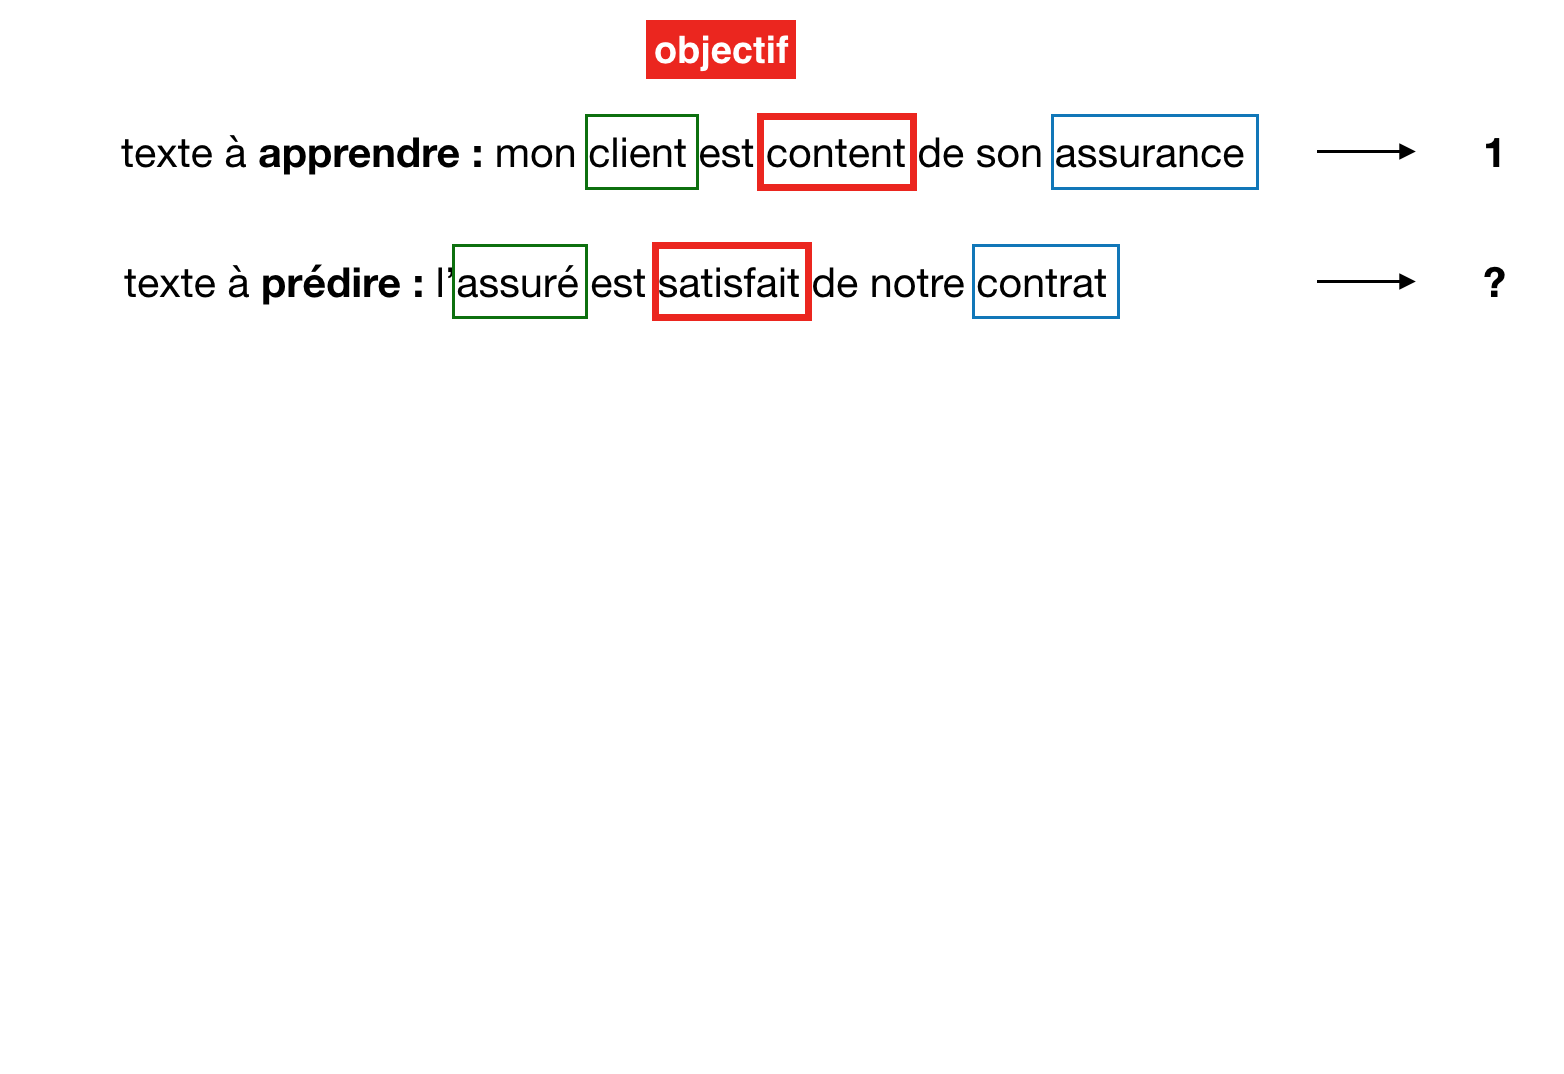

In [26]:
Image("img/vectBOW1.png", width=700, height = 200)

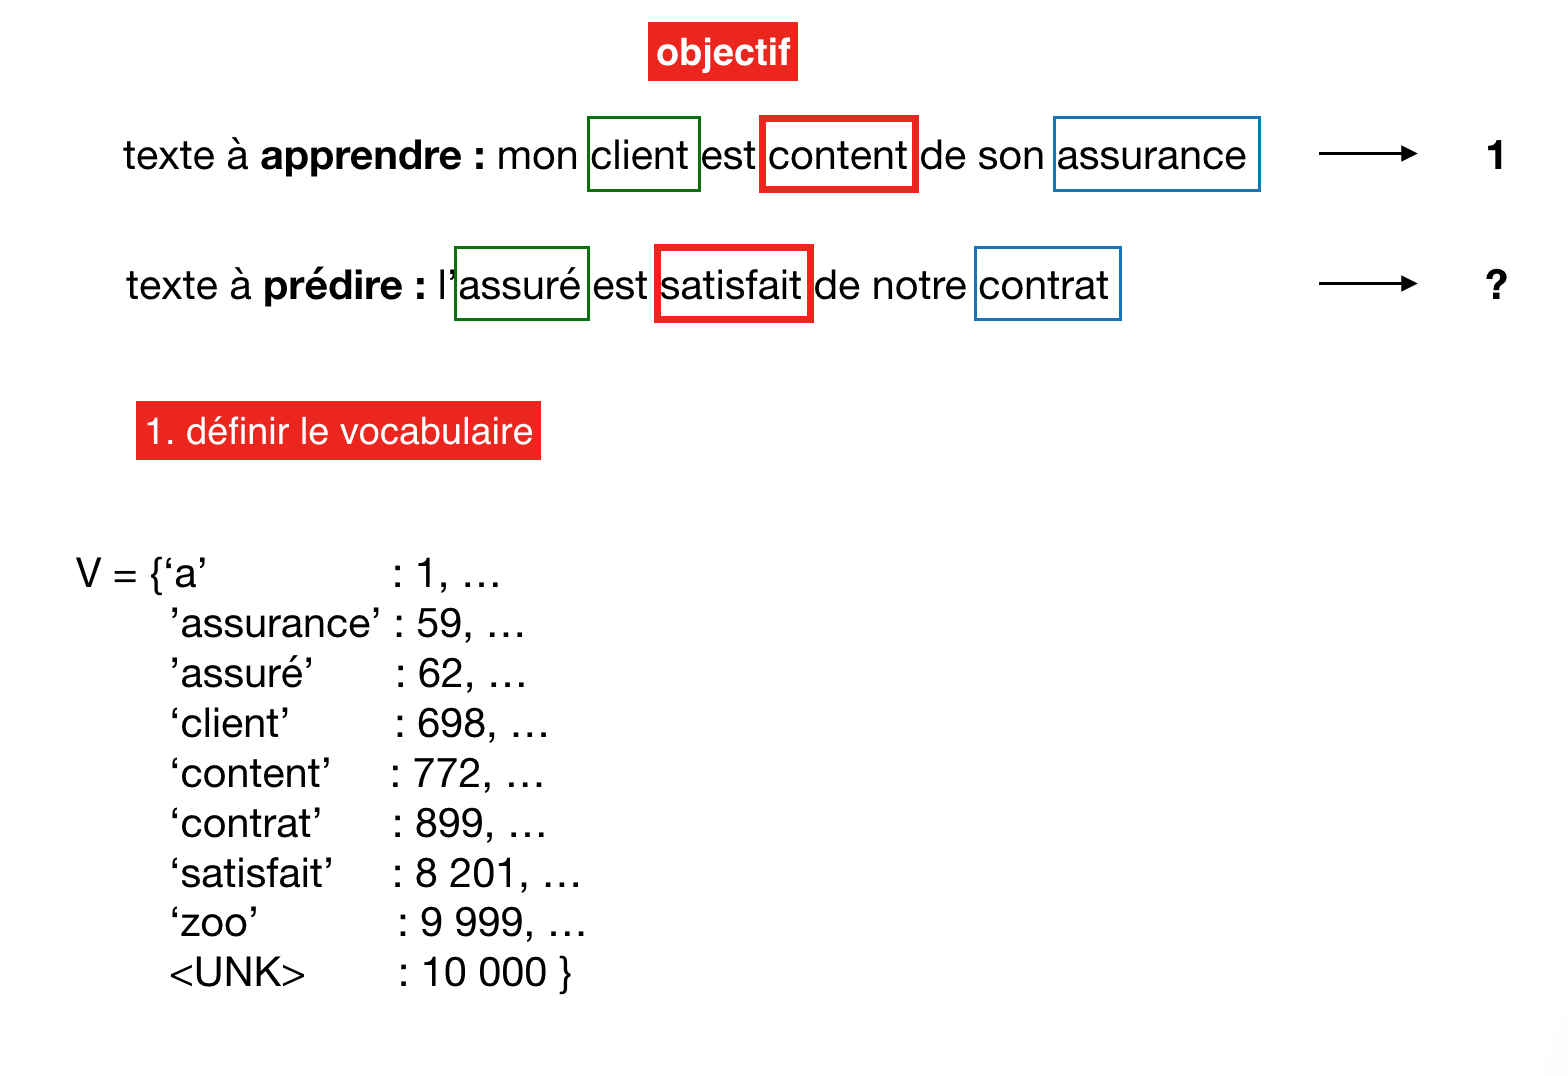

In [27]:
Image("img/vectBOW2.png", width=750, height = 200)

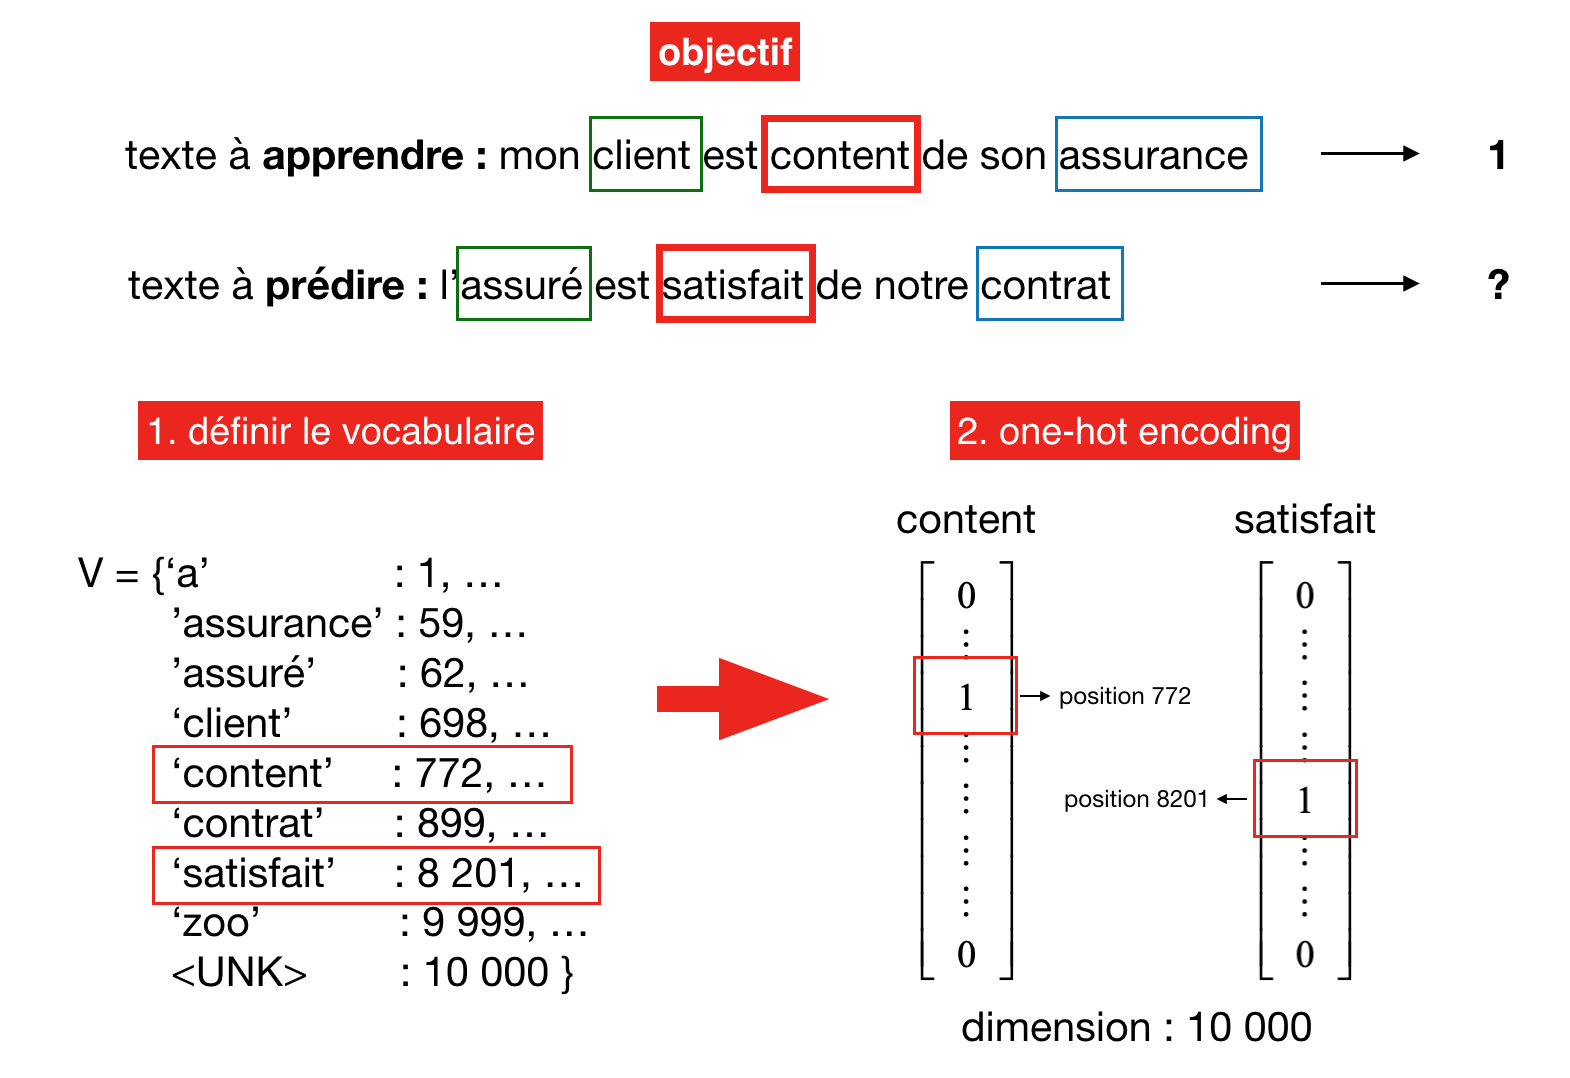

In [28]:
Image("img/vectBOW3.png", width=750, height = 200)

**remarques :**

- **approche naïve de vectorisation des mots** : approche one-hot, approche TF-IDF

- one-hot et TF-IDF sont des vecteurs **creux** (*sparse* en anglais) de grandes dimensions

- one-hot et TF-IDF **sauvegardent** les mots sans prendre en compte le contexte : vect("content") $\neq$ vect("satisfait")

**solution :** approche word embedding

### Word embedding

$\color{#228B22}{\text{word embedding}}$ (**plongement de mots** en français) : vectorisation des mots de sorte que les mots apparaissant dans des contextes similaires ont des significations apparentées

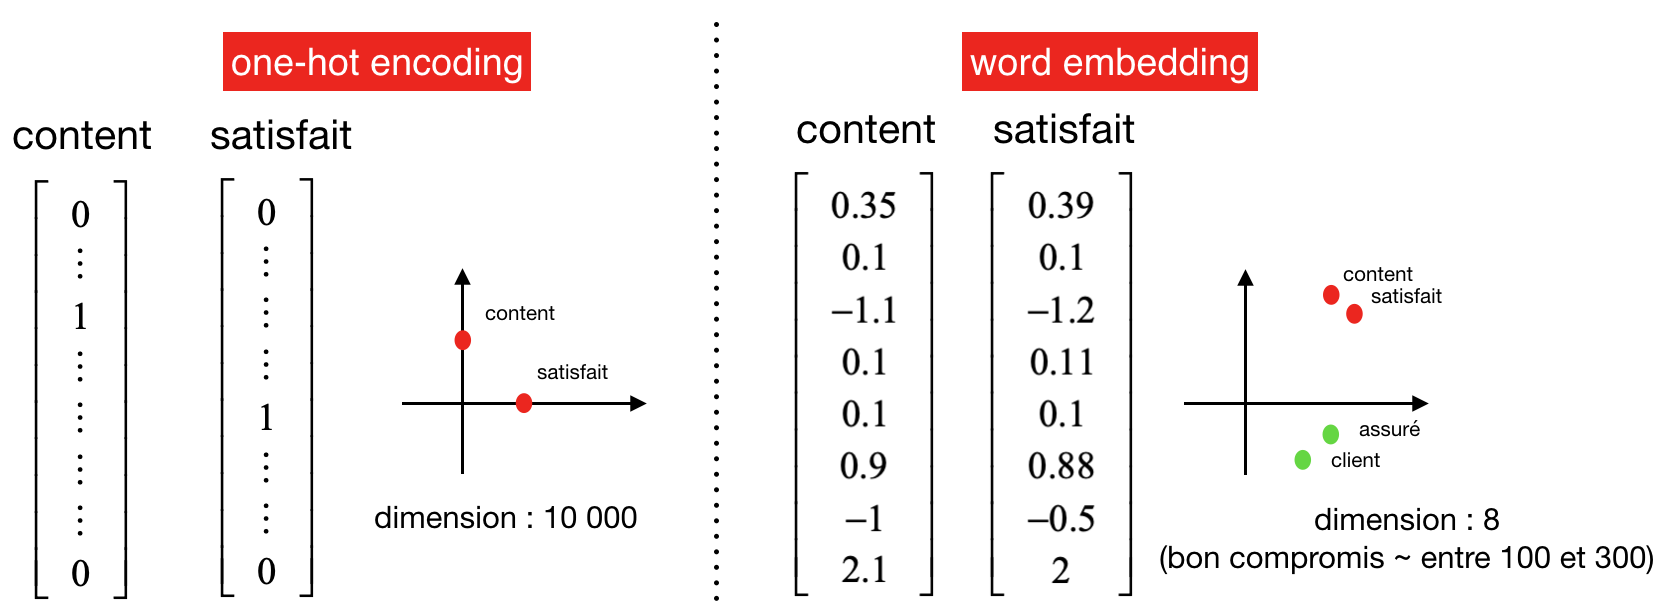

In [25]:
Image("img/vectWE.png", width=700, height = 200)

- vecteurs denses de plus petites dimensions

- mot1 $\approx$ mot2 $\implies$ word_embedding(mot1) $\approx$ word_embedding(mot2)

- word embedding populaire : **word2vec**

### word2vec

- **principe** : utiliser les **réseaux de neurones** pour construire ces vecteurs

- deux architectures de réseaux de neurones word2vec : **continuous bag-of-words** (CBOW) ou **skip-gram**

- $\color{#228B22}{\text{modèle CBOW}}$ : cherche à prédire un mot à partir du contexte

- $\color{#228B22}{\text{modèle skip-gram}}$ : cherche à prédire les mots du contexte à partir d'un mot central

- $\color{#228B22}{\text{contexte, cible}}$ :

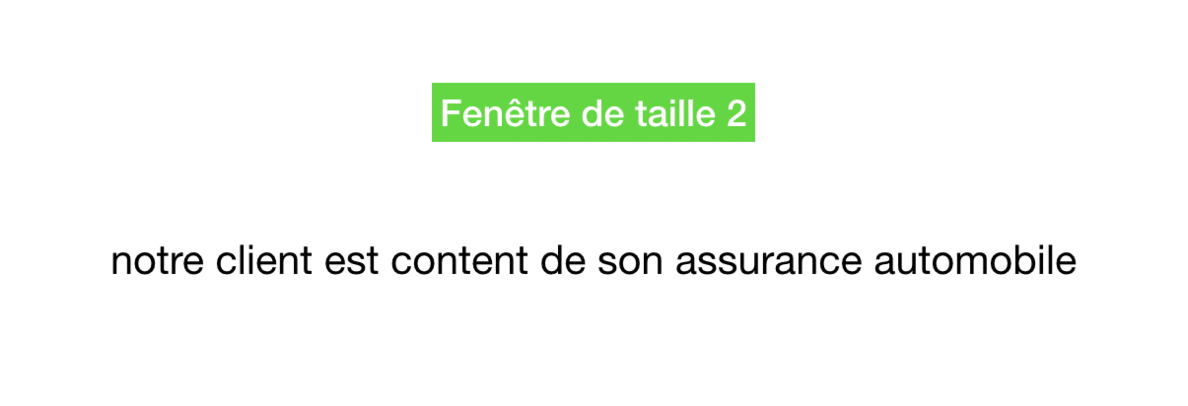

In [43]:
display(Image("img/context_word.gif.png", width=500, height = 200))

**Introduction au CBOW**

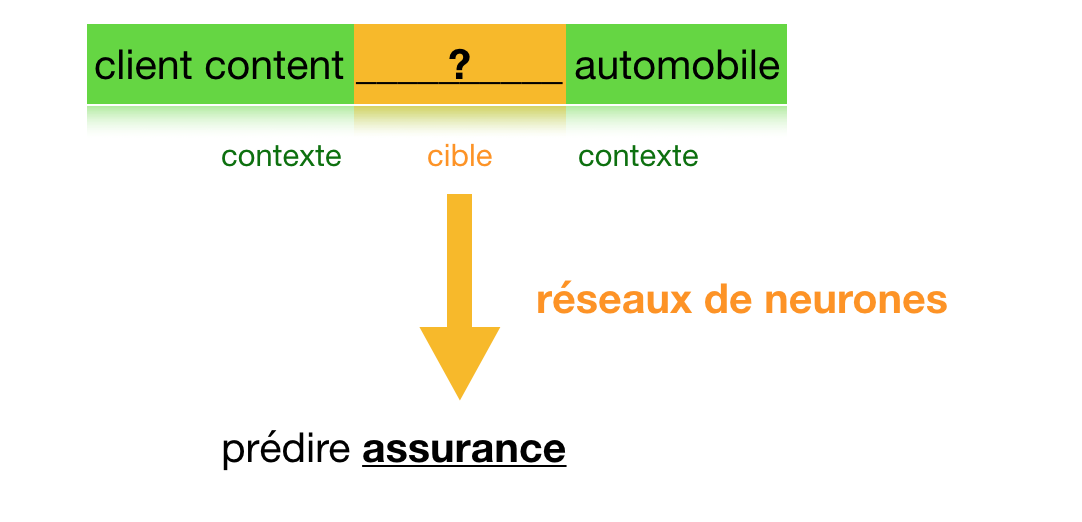

In [29]:
display(Image("img/CBOW_1.png", width=500, height = 200))

**CBOW**

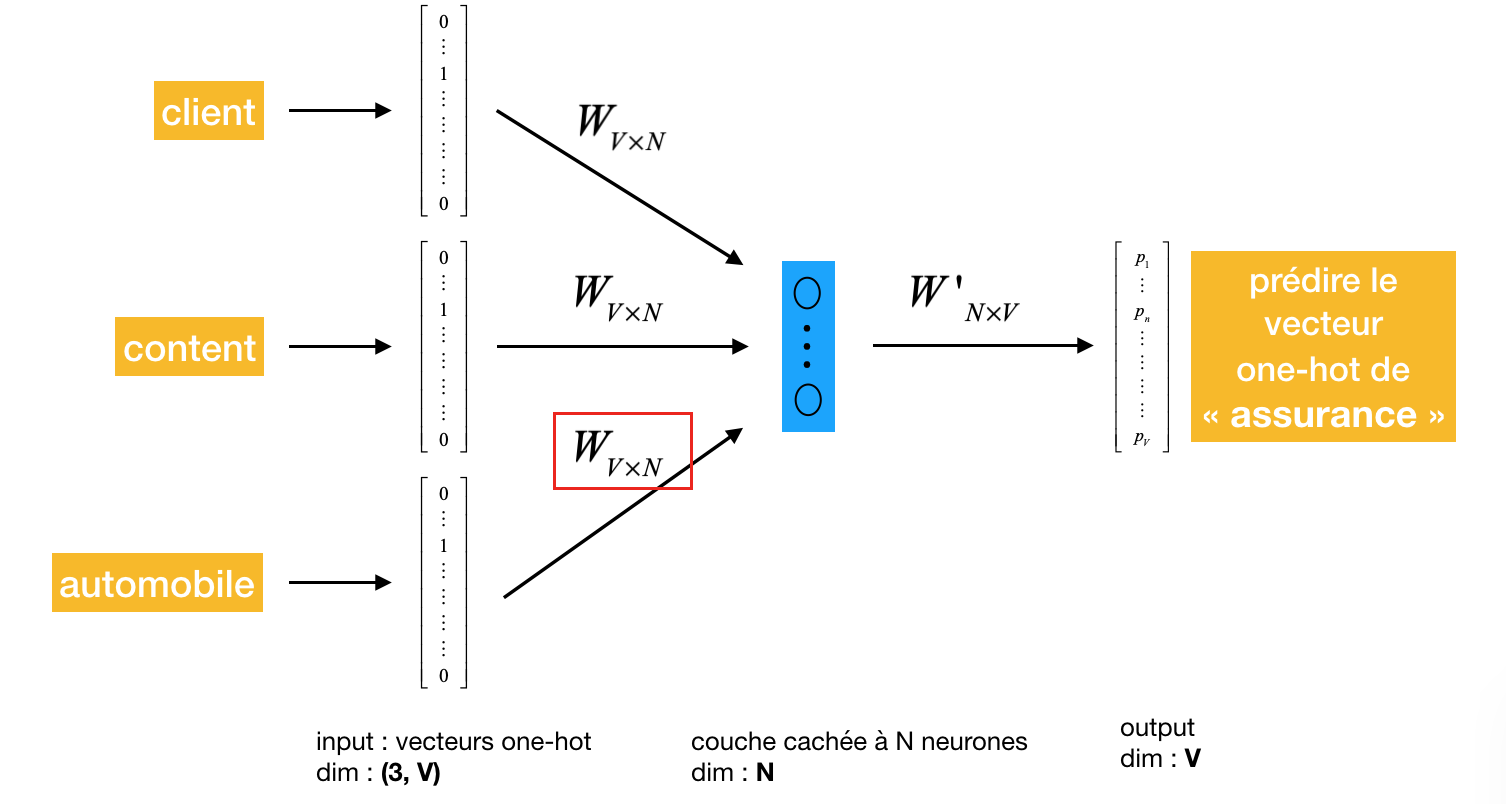

In [30]:
display(Image("img/CBOW_2.png", width=700, height = 200))

**Introduction au skip-gram**

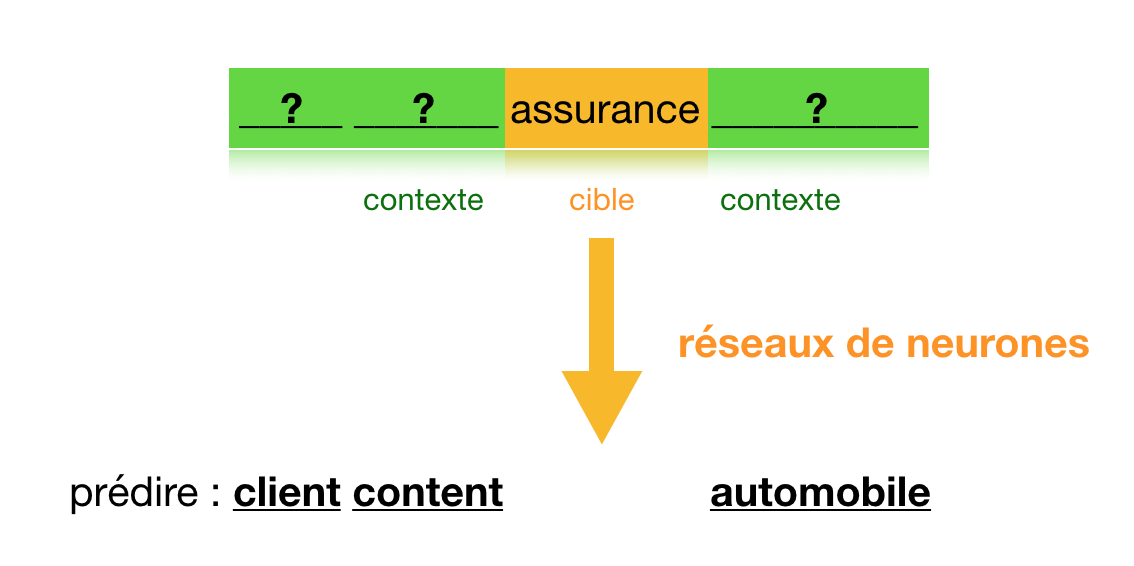

In [31]:
Image("img/SG_1.png", width=500, height = 200)

**Skip-gram**

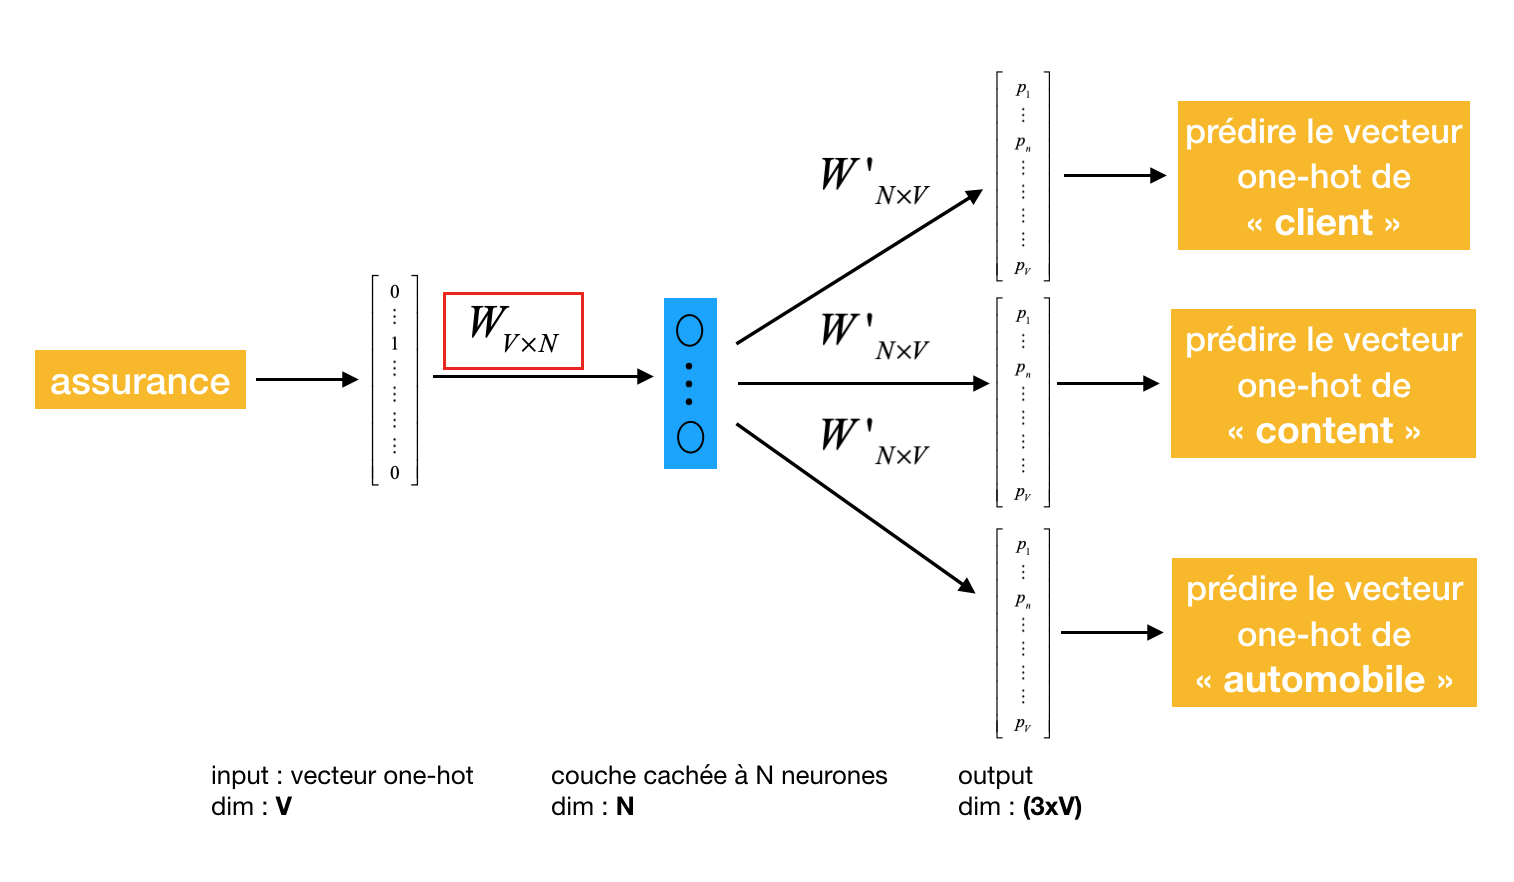

In [32]:
Image("img/SG_2.png", width=700, height = 200)

**Skip-gram : un peu de mathématiques**

- prédire les **mots du contexte** sachant le mot central :

$$p(w_{t-h}, \dots, w_{t+h} \ |\  w_t; \theta) = \prod\limits_{-h \leq k\leq h \ ,\ k\neq0} p(w_{t+k}\ | \ w_t ; \theta) $$

- calculer (et maximiser) la proba du paramètre sachant les mots : **vraisemblance**
$$L(\theta) = \prod\limits_{t=1,\dots, T} p(w_{t-h}, \dots, w_{t+h} \ |\  w_t; \theta) = \prod\limits_{t=1,\dots, T} \prod\limits_{-h \leq k\leq h \ ,\ k\neq0} p(w_{t+k}\ | \ w_t ; \theta)$$

- **log-vraisemblance** :
$$\mathcal{L}(\theta) = -\frac{1}{T}\log L(\theta) = -\frac{1}{T}\sum\limits_{t=1,\dots,T}\sum\limits_{-h\leq k\leq h\ , \ k\neq0}\log p(w_{t+k}\ | w_t ; \theta)$$

- **softmax** et **paramètre**:
$$p(w_O\ | \ w_I) = \frac{e^{<{v'}_{w_O}\ ,\ v_{w_I}>}}{\sum\limits_{w\in V}e^{<{v'}_{w}\ ,\ v_{w_I}>}} \ , \ \theta = [{v}_{w_1}, \cdots, v_{w_{|V|}}, {v'}_{w_1}, \cdots] \in \mathbb{R}^{2\cdot N\cdot|V|}$$

- algorithme de **descente de gradient** pour entraîner notre modèle

- **problème** : le calcul de softmax est trop long

- **solutions** : **softmax hierarchique** ou **negative sampling**

$\color{#228B22}{\text{Softmax hierarchique}}$ :

https://www.quora.com/What-is-hierarchical-softmax

$\color{#228B22}{\text{Negative sampling}}$ :

http://mediamining.univ-lyon2.fr/people/guille/word_embedding/skip_gram_with_negative_sampling.html

### classification de textes avec word2vec

**agrégation** puis **classification classique** :

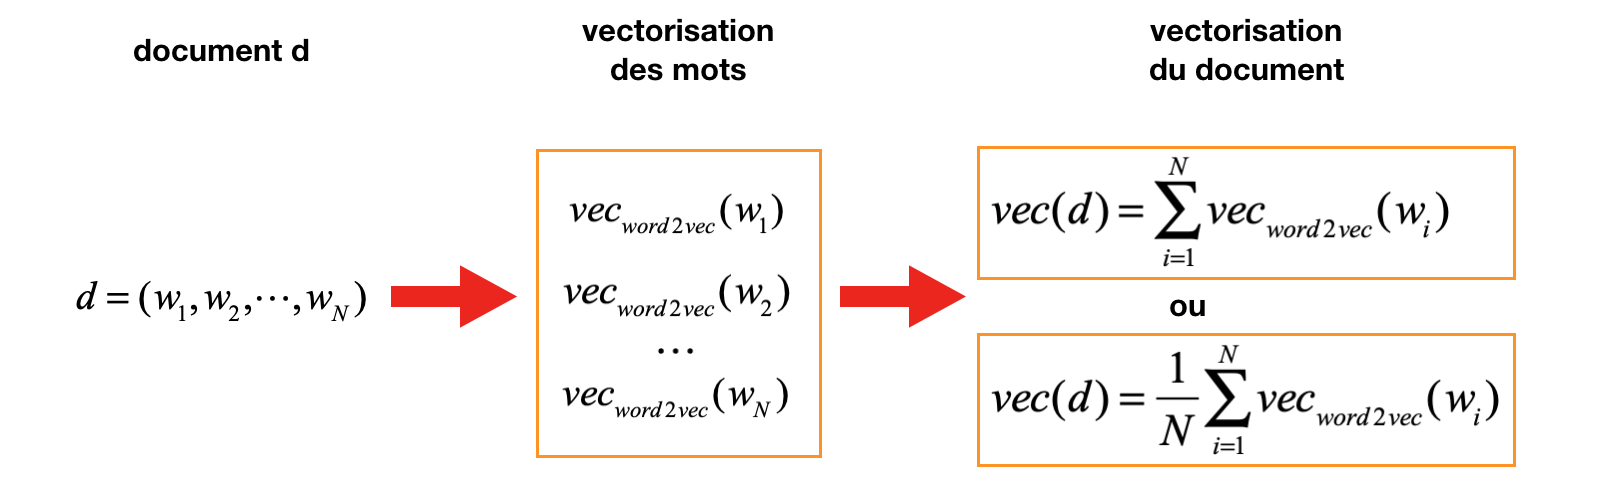

In [27]:
Image("img/doc_som_moy.png", width=650, height = 200)

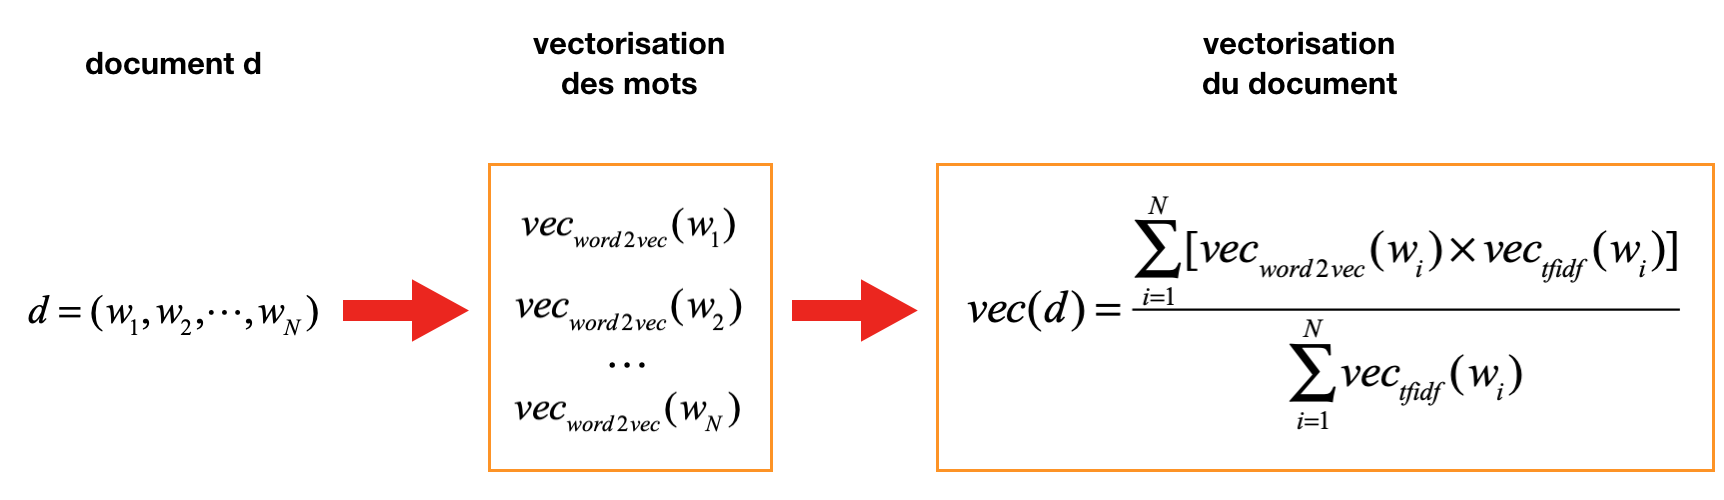

In [28]:
Image("img/doc_som_moypond.png", width=700, height = 200)

**doc2vec** puis **classification classique** : voir $\color{red}{\text{section suivante}}$ pour le modèle doc2vec

classification avec les **réseaux de neurones** : voir $\color{red}{\text{cours 2}}$ pour les modèles séquentiels

### doc2vec

vectorisation des **documents** (resp. des mots) de sorte que les **documents** (resp. les mots) apparaissant dans des contextes similaires ont des significations apparentées

$\color{#228B22}{\text{Distributed Memory (DM)}}$ : 

$$p(w_i\ | \ w_{i-h}, \dots, w_{i+h}, d)$$

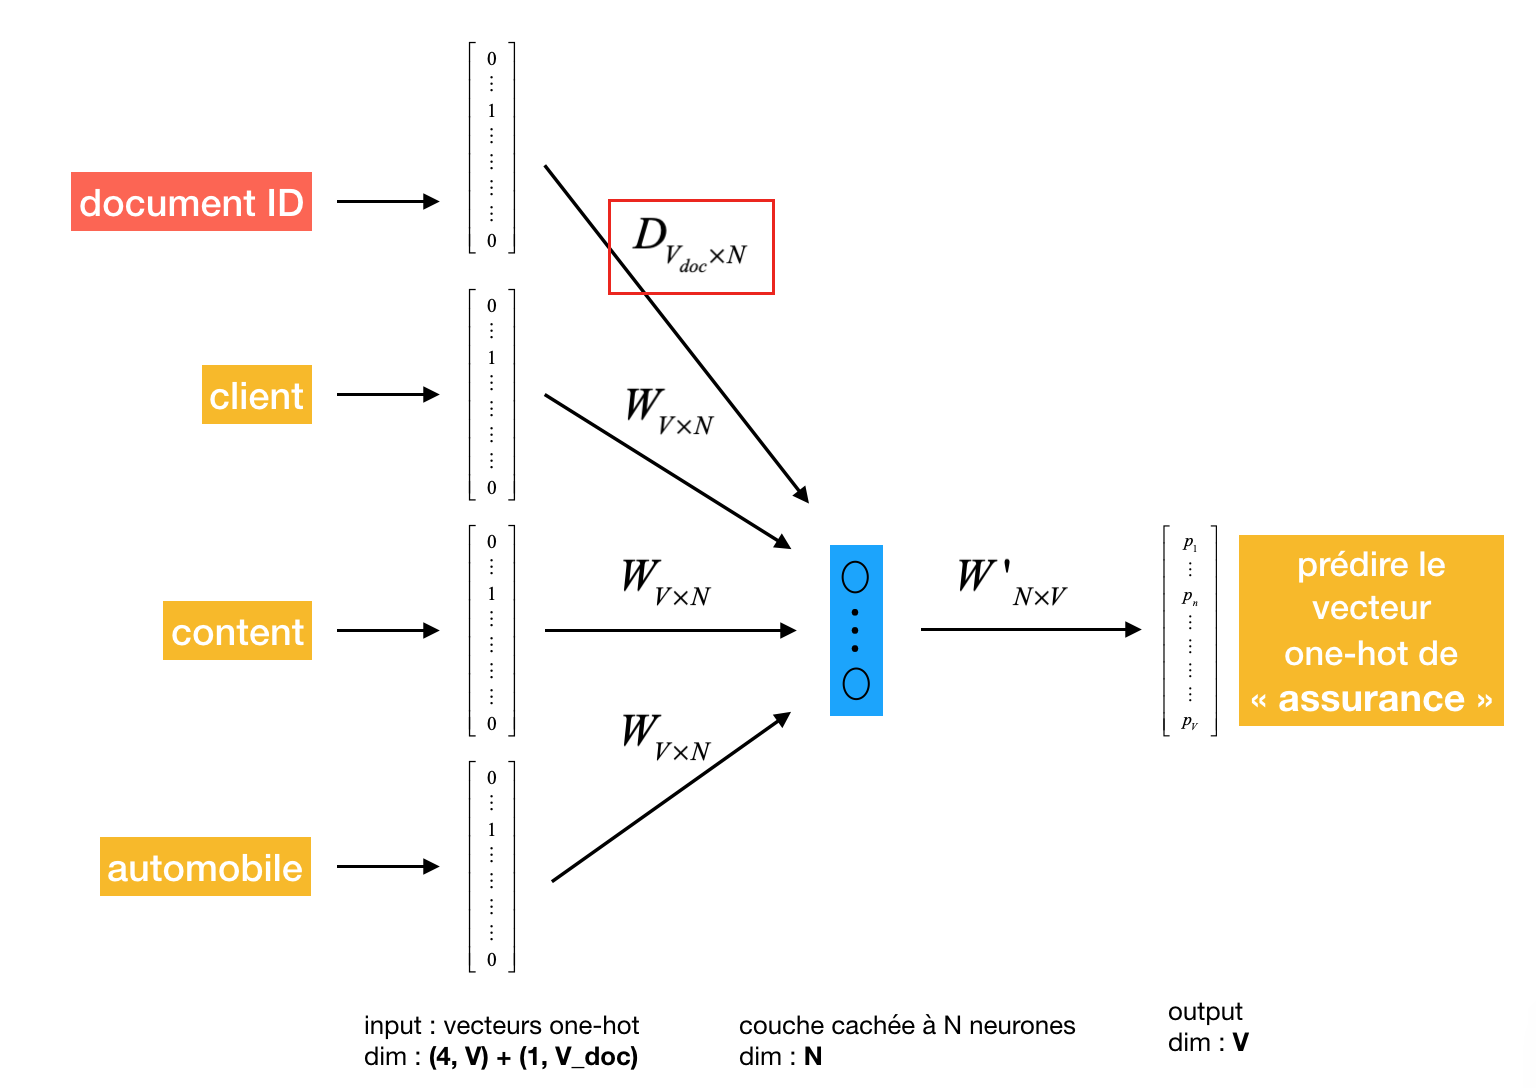

In [33]:
Image("img/DM.png", width=700, height = 200)

$\color{#228B22}{\text{Distributed Bag-Of-Words (DBOW)}}$ : 

$$p(w_{i-h}, \dots, w_{i+h} \ | \ d)$$

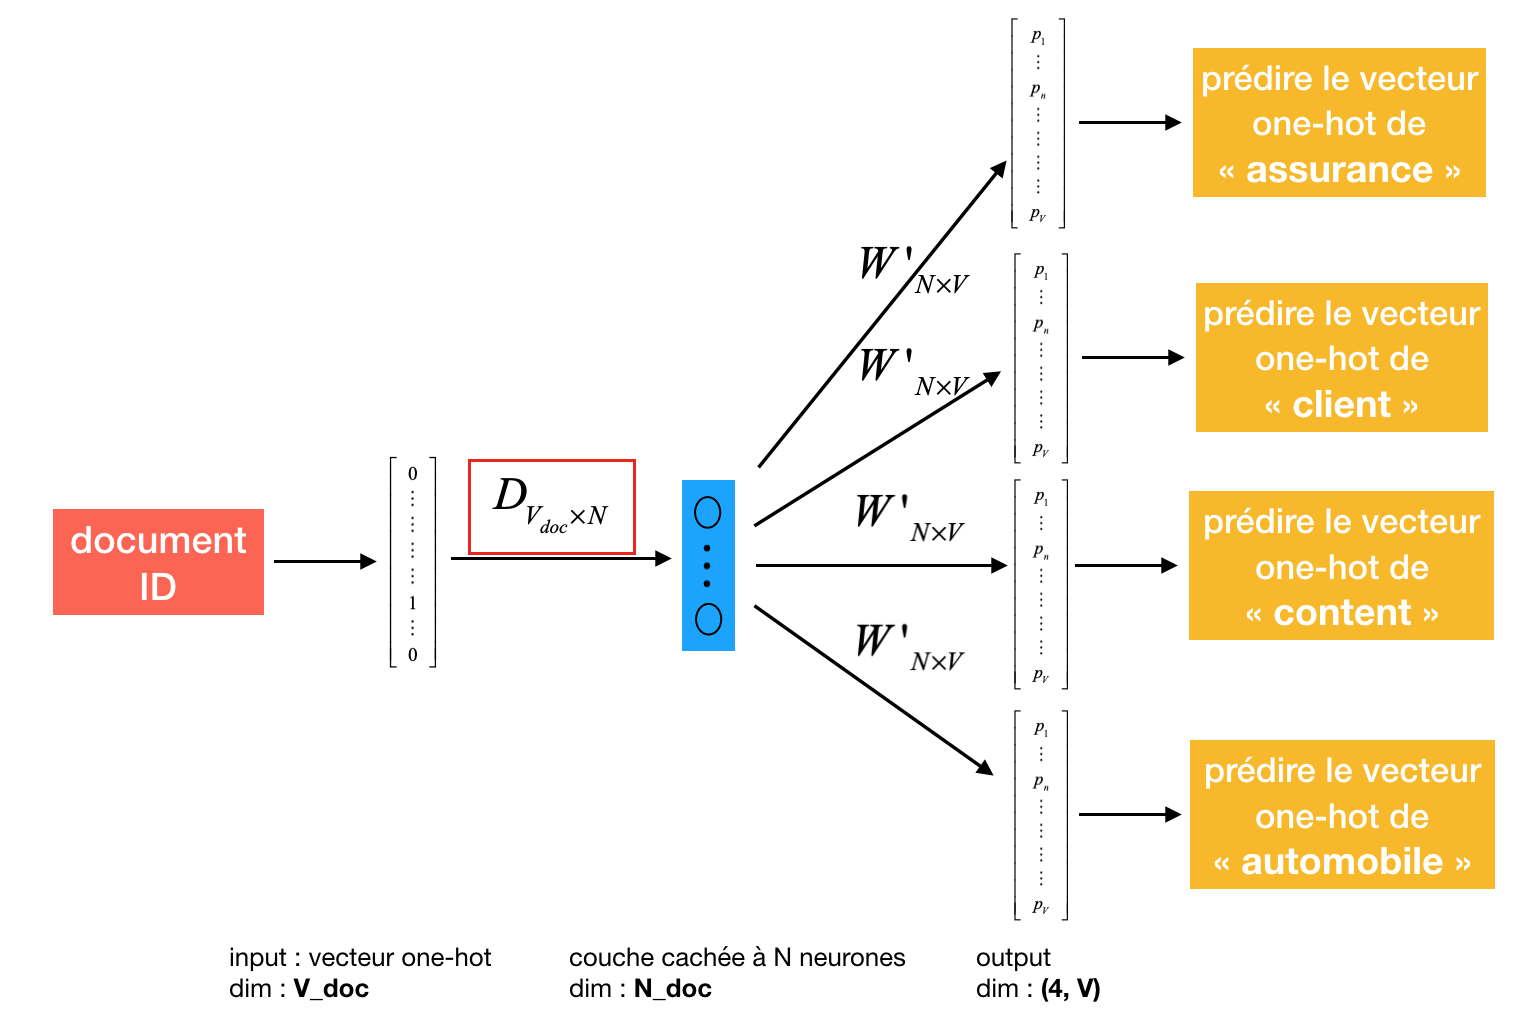

In [34]:
Image("img/DBOW.png", width=700, height = 200)

**Résumé**

- word embedding : 
    - word2vec : **CBOW** et **skip-gram**
- doc embedding : 
    - doc2vec : **DM** et **DBOW**
- classification de textes avec ces embeddings

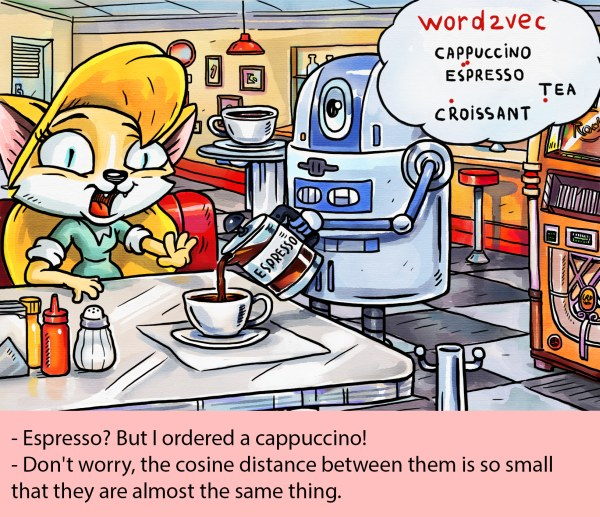

In [11]:
Image("img/cartoon_w2v.png", width=580, height = 200)

auteur : Dmitry Malkov, data scientist et dessinateur de BD chez Data Monsters

## 2. Topic modeling
$\color{grey}{\text{*cacher le code}}$

In [2]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

### représentation vectorielle des documents / topics

- $\color{#228B22}{\text{topic modeling}}$ (**modèle thématique** en français) : processus d'identification des topics (ou thèmes) permettant de décrire un ensemble de documents

**hypothèses** :
- chaque **document** est vu comme un **mélange de topics**
- chaque **topic** est vu comme une collection de mots

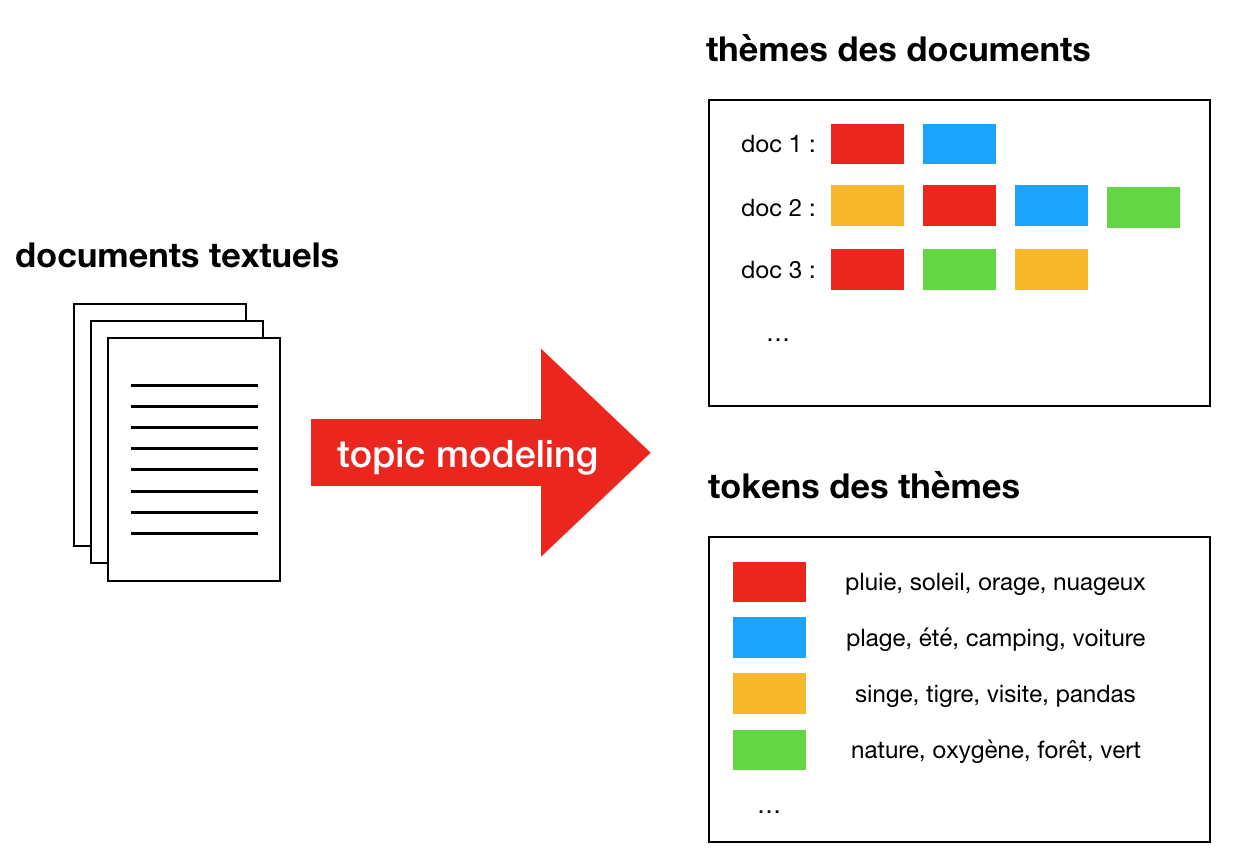

In [3]:
Image("img/TM.png", width=350, height = 200)

**topic models** les plus populaires : LSA, PLSA, LDA

### Latent Semantic Analysis (LSA)

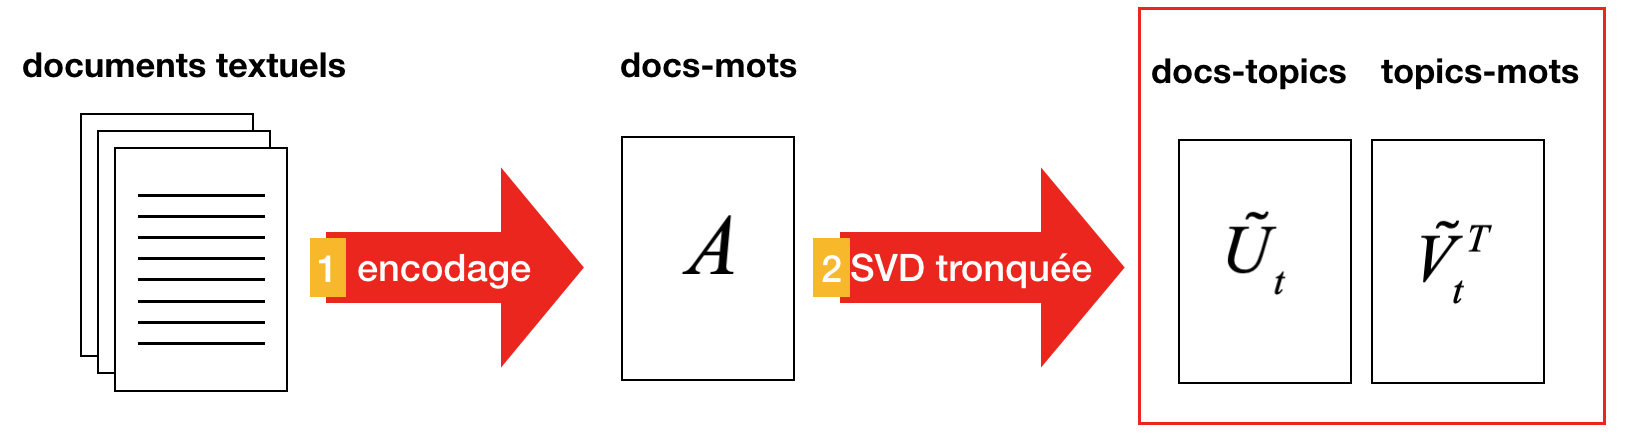

In [12]:
Image("img/LSA_schema.png", width=700, height = 200)

**1. encodage en une matrice A**

- encodage par one-hot (voir $\color{red}{\text{introduction}}$)

- encodage par TF-IDF (voir $\color{red}{\text{introduction}}$)

**2. factorisation de la matrice A par SVD tronquée**

- $\color{#228B22}{\text{Décomposition en Valeurs Singulières}}$ (SVD) :

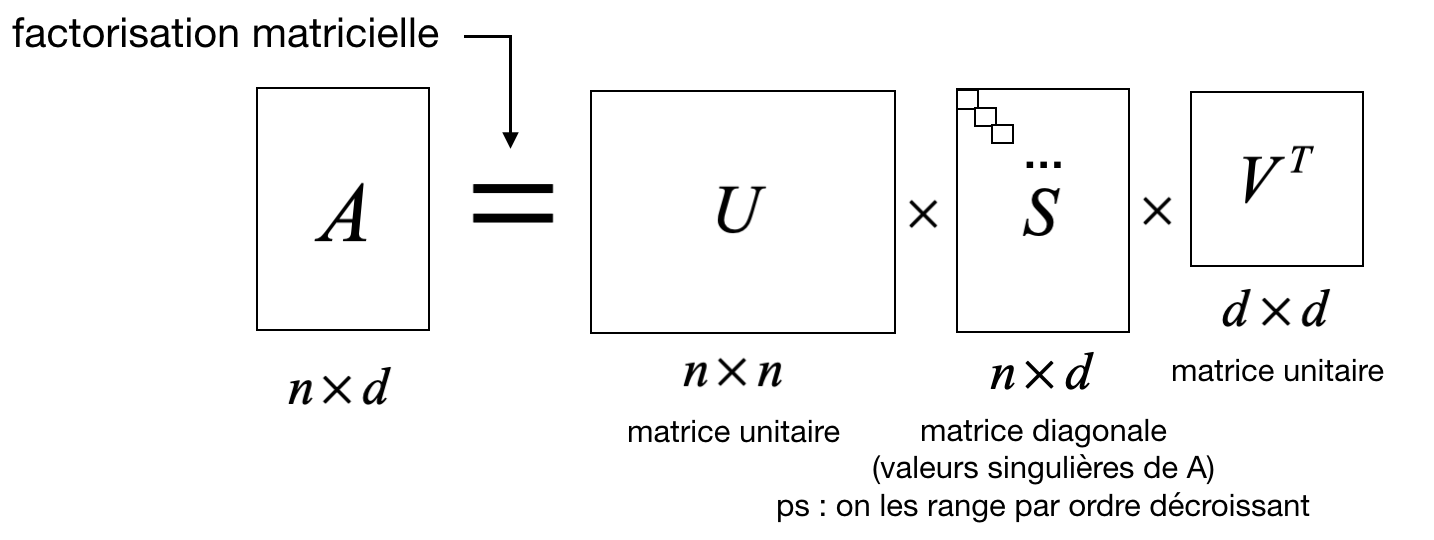

In [4]:
Image("img/SVD.png", width=480, height = 200)

- $\color{#228B22}{\text{SVD tronquée}}$

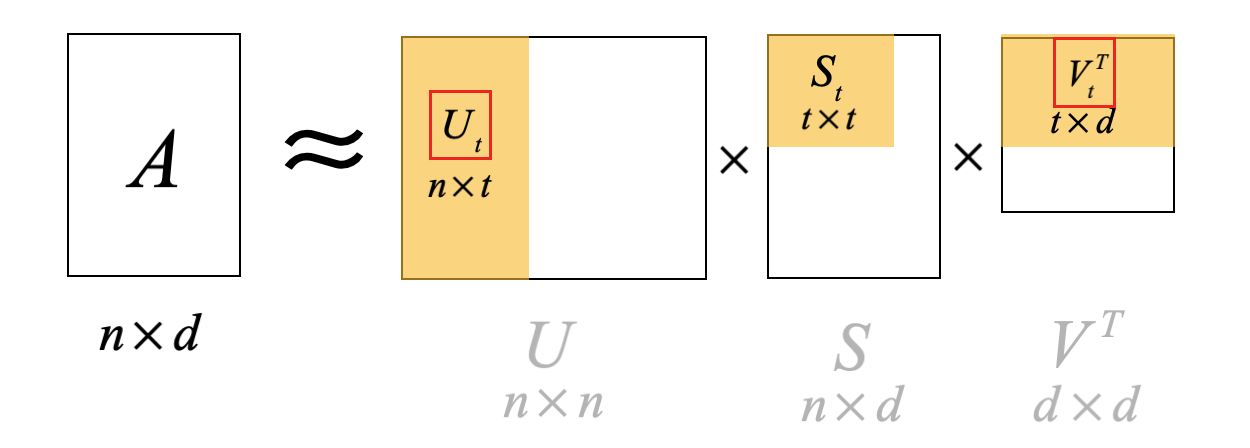

In [5]:
Image("img/SVDt.png", width=480, height = 200)

**Comment choisir $\tilde{U}_t$ et $\tilde{V}_t^T$ ?** 

- **solution 1** : 

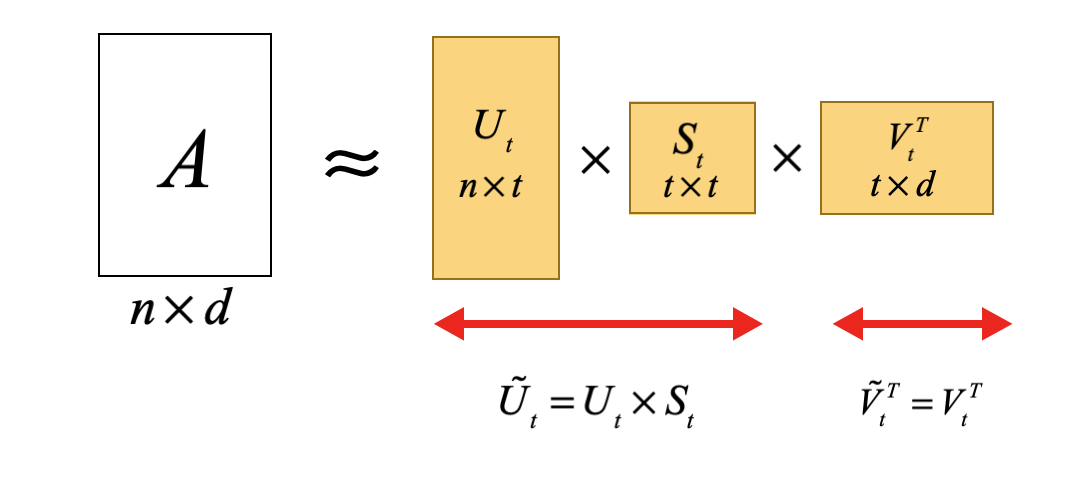

In [22]:
Image("img/SVDt2.png", width=410, height = 200)

- **solution 2** : 

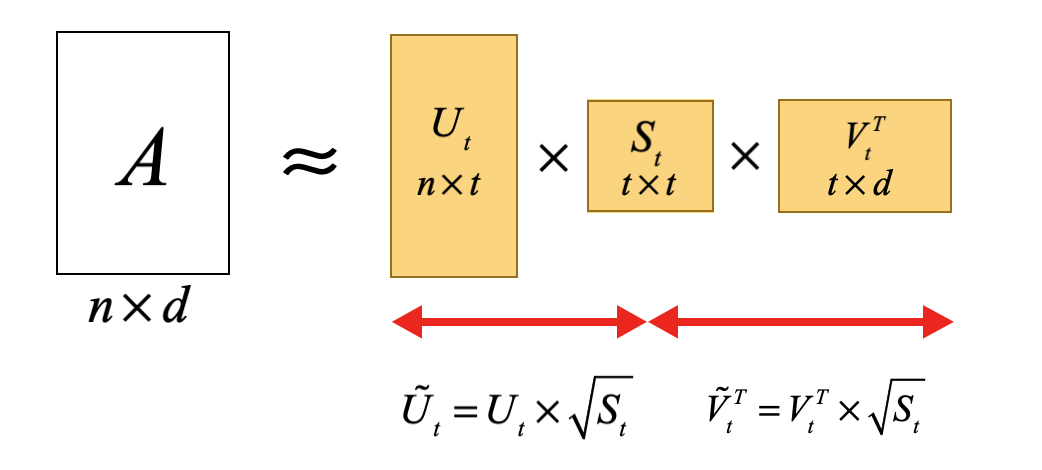

In [21]:
Image("img/SVDt1.png", width=410, height = 200)

**Remarques** : 

- approche **algèbre linéaire**

- évaluer la similarité entre les **documents** (similarité cosinus)

- évaluer la similarité entre les **mots** (similarité cosinus)

**désavantages** :

- vecteurs difficilement **interpretable**

- besoin d'un **grand ensemble de docs et de vocabulaires** pour obtenir une bonne précision

### Probabilistic Latent Semantic Analysis (PLSA)

**Idée** : trouver un modèle probabiliste avec des **topics latent** qui peut générer les observations du matrice mots-docs

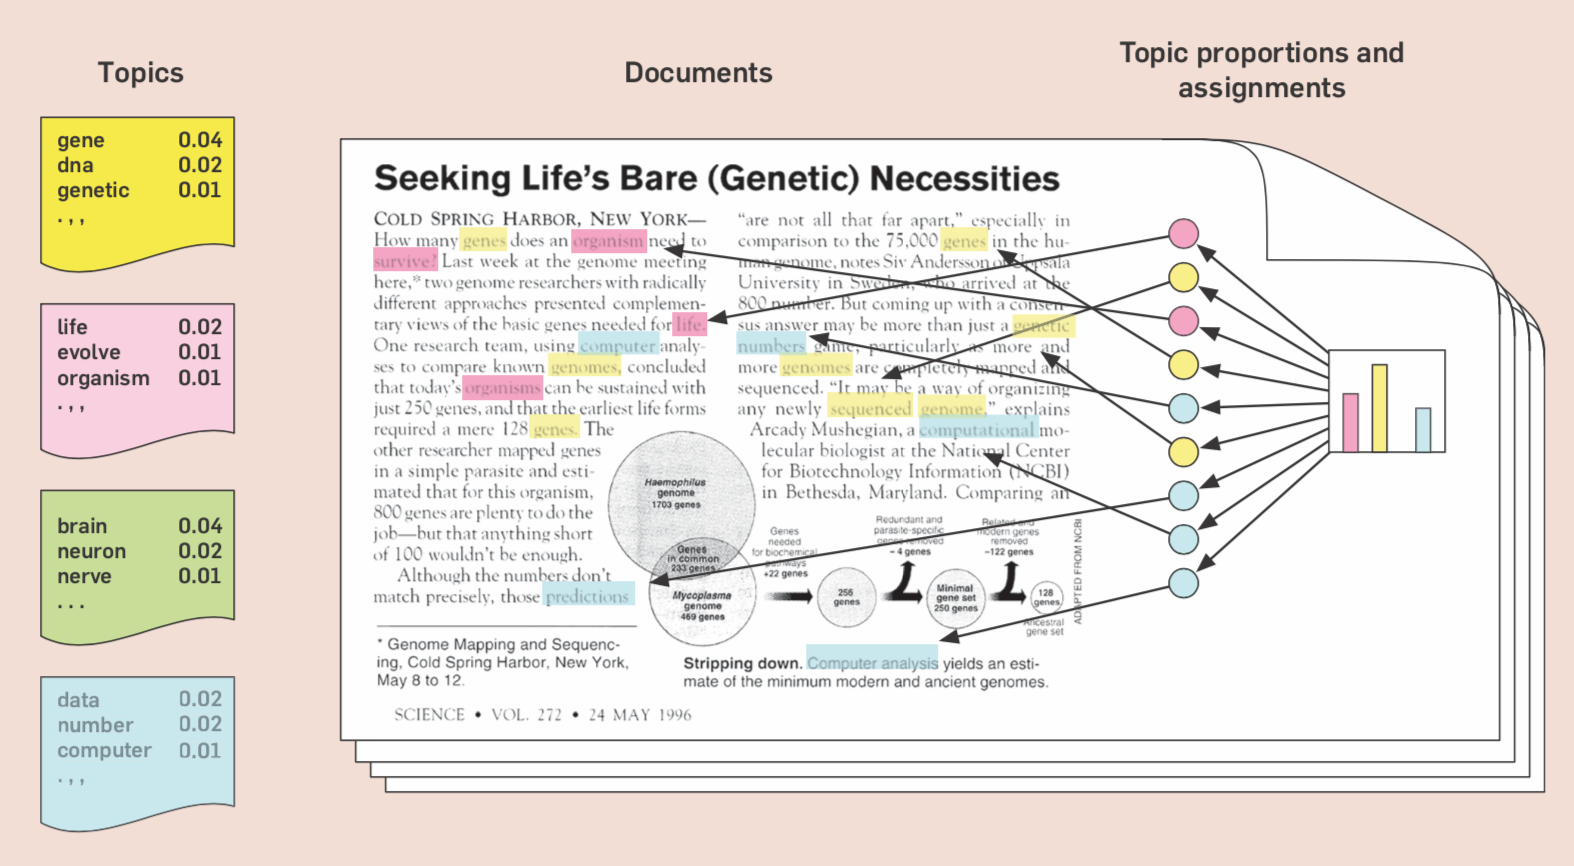

In [30]:
Image("img/topic_generated.png", width=600, height = 200)

Par David Blei, Probabilistic topic models, 2012

**Formellement :**

**Input** : collection de textes **bag-of-words** : 

$$n_{wd} = \text{ nombre d'occurence du mot } w \text{ dans le document } d $$

**Trouver** : probabilité que le **mot $w$** soit dans un **topic $t$** :

$$\phi_{wt} = p(w|t)$$

probabilité que le **topic $t$** soit dans le **document $d$** :

$$\theta_{td} = p(t|d)$$


<b>comment est généré un document $d$ d'après le modèle $\color{red}{\text{PLSA}}$ ?</b>

un document $d = (w_1, \dots, w_W)$ est généré de la manière suivante : pour tout $w \in d$

- $t \sim Multinomial(\theta_{\cdot d}) = Multinomial(\ p(t_1|d), \ p(t_2|d), \cdots \ )$

- $w\sim Multinomial(\phi_{\cdot t}) = Multinomial(\ p(w_1|t), \ p(w_2|t), \cdots \ )$

**modèle graphique associé** au PLSA :

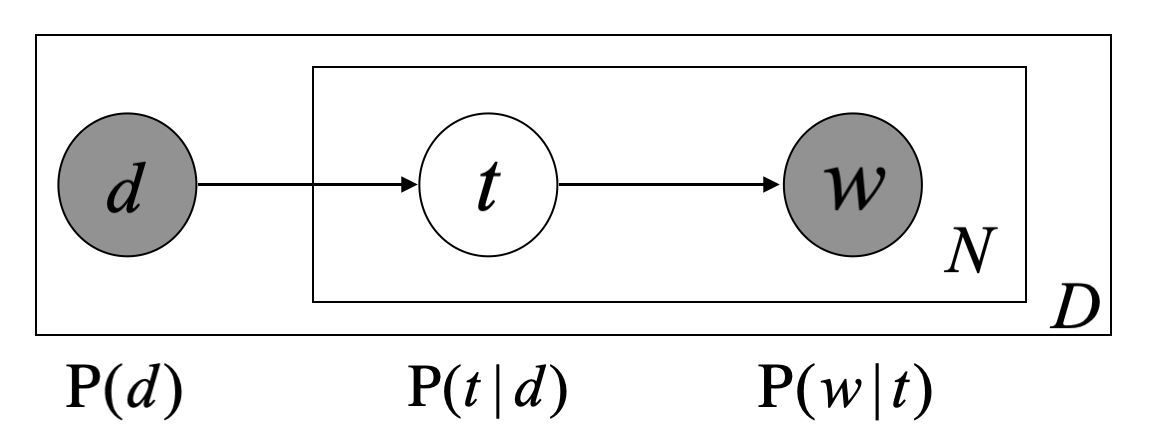

In [33]:
Image("img/PLSA_GM.png", width=400, height = 200)

**écriture probabiliste**

- $p(w \ | \ d) = \sum\limits_{t\in T} p(w \ |\ t, d)\cdot p(t \ | \ d) = \sum\limits_{t\in T} p(w \ |\ t)\cdot p(t \ | \ d) = \sum\limits_{t\in T} \phi_{wt}\cdot\theta_{td}$

**écriture matricielle**

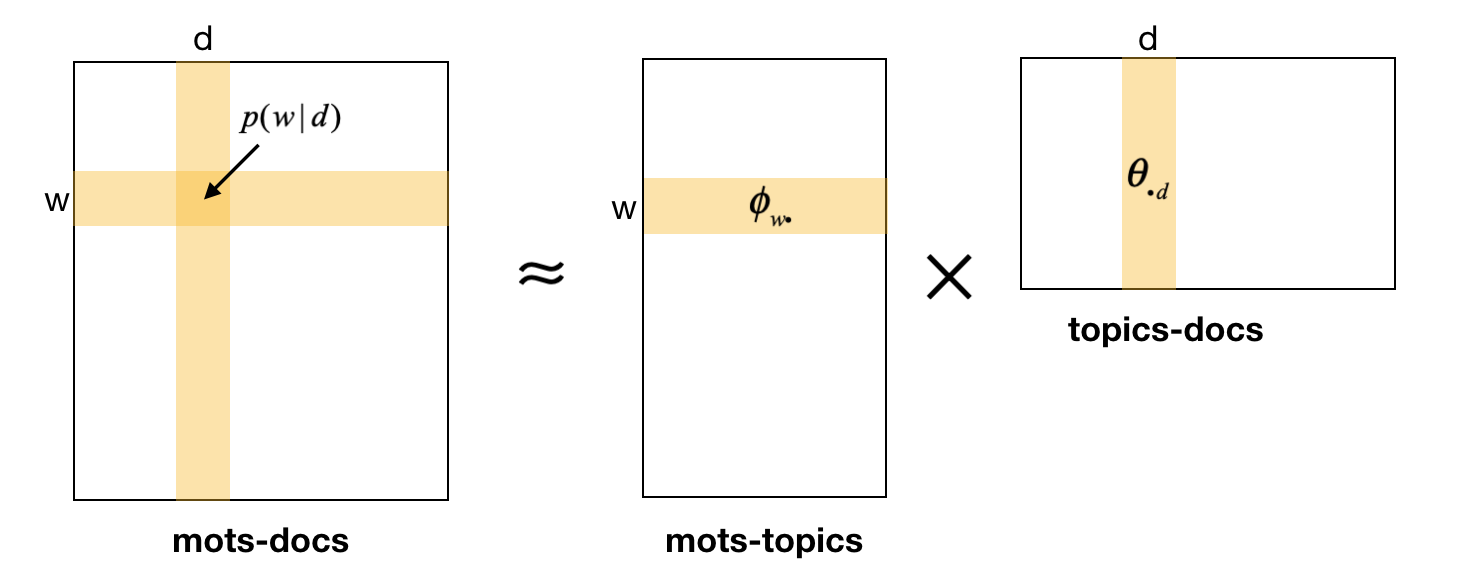

In [6]:
Image("img/PLSA.png", width=500, height = 200)

**PLSA $\approx$ aspect probabiliste de LSA**

**Entraînement du modèle PLSA**

posons $\Theta = [\cdots\theta_{ij}\cdots]$ et $\Phi = [\cdots\phi_{ij}\cdots]$

- calcul de la **vraisemblance** (objectif maximiser ce terme) :
$$L(\Theta, \Phi) = \prod_d\prod_w p(d,w)^{n_{wd}} = \prod_d p(d)\prod_w p(w|d)^{n_{wd}}$$

- calcul de la **log-vraisemblance** (objectif maximiser ce terme) :
$$\mathcal{L}(\Theta, \Phi) = \sum_d\sum_w n_{wd} \log\sum_t\phi_{wt}\cdot\theta_{td}$$

**problème** : $\color{red}{\log\sum_t}$ dur à maximiser

**solution** : **algorithme EM** - https://fr.wikipedia.org/wiki/Algorithme_esp%C3%A9rance-maximisation

### Latent Dirichlet Allocation (LDA)

https://meritis.fr/ia/topic-model-une-machine-peut-elle-comprendre-le-sujet-dun-article/

**PLSA** : topic modeling basé sur une inférence **fréquentiste** : $\phi_t = (\phi_{wt})_{w\in W}$ et $\theta_d = (\theta_{td})_{t\in T}$ sont des variables **déterministes**

$\color{#228B22}{\text{LDA}}$ : topic modeling basé sur une inférence **bayésienne** : $\phi_t = (\phi_{wt})_{w\in W}$ et $\theta_d = (\theta_{td})_{t\in T}$ sont des variables **aléatoires** latentes de la distributions Dirichlet :

- $\theta_d \sim Dir(\alpha)\ , \ \ \ \phi_t \sim Dir(\beta)$

- $Dir(\theta_d| \alpha) = \frac{\Gamma(\sum_t\alpha_t)}{\prod_t \Gamma(\alpha_t)}\prod_t \phi_{td}^{\alpha_t - 1} \ , \ \ \ Dir(\phi_t| \beta) = \frac{\Gamma(\sum_w\beta_w)}{\prod_w \Gamma(\beta_w)}\prod_w \phi_{wt}^{\beta_w - 1}$

**LDA $\approx$ extension du PLSA**

<b>comment est généré un document $d$ d'après le modèle $\color{red}{\text{LDA}}$ ?</b>

un document $d = (w_1, \dots, w_W)$ est généré de la manière suivante : pour tout $w \in d$

- $\theta_d \sim Dir(\alpha)\ , \ \ \ \phi_t \sim Dir(\beta)$

- $t \sim Multinomial(\theta_{\cdot d})\ , \ \ \  w\sim Multinomial(\phi_{\cdot t})$

**modèle graphique associé** au LDA :

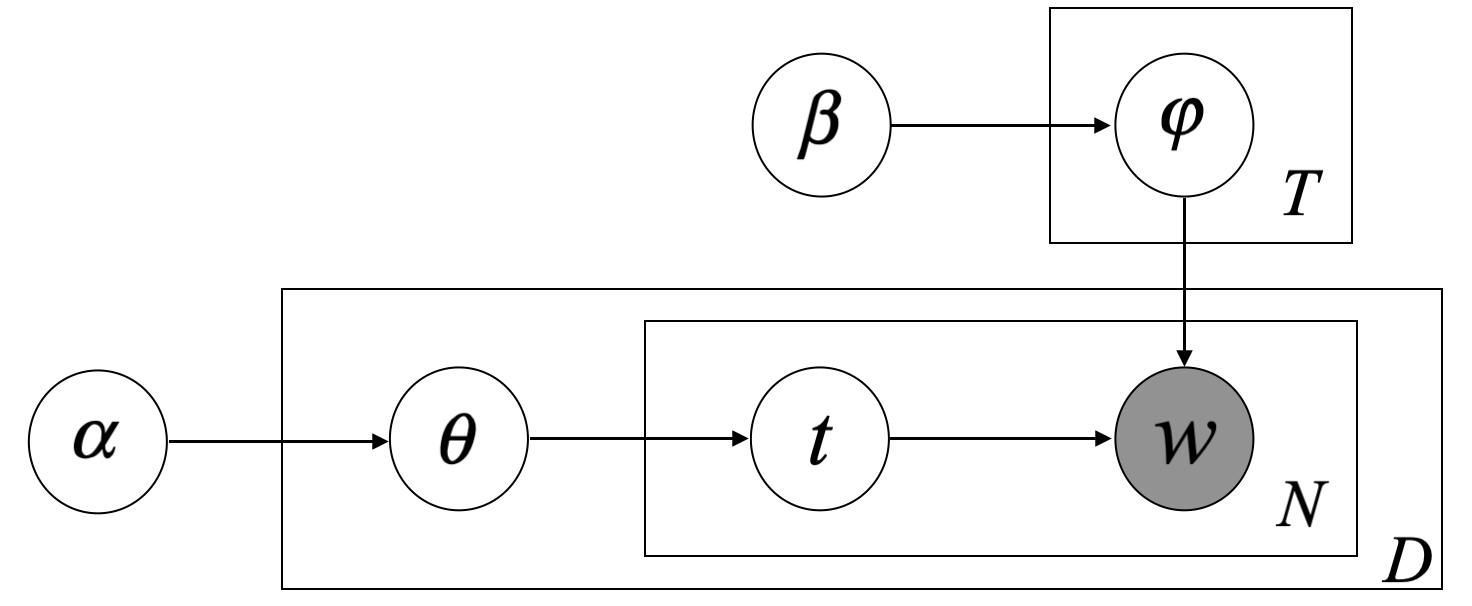

In [36]:
Image("img/LDA_GM.png", width=500, height = 200)

- question : **comment estimer les variables aléatoires $\theta_d$ et $\phi_t$ ?**

- réponse : **Gibbs sampling** (ou échantillonnage de Gibbs en français) - https://fr.wikipedia.org/wiki/%C3%89chantillonnage_de_Gibbs

**Résumé :**

- **topic modeling**

- topic models : 
    - **LSA**, une approche d'algèbre linéaire;
    - **PLSA**, une inférence fréquentiste;
    - **LDA**, une inférence bayésienne;

- section suivante : **TP sur le topic modeling**

## 3. TP : Découvrir et visualiser les topics

$\color{grey}{\text{*afficher le code}}$

In [2]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

**Introduction**

Les topic models (*modèles thématiques* en français) sont une famille de modèles qui sont capables de découvrir les topics (*thèmes* en français) d'une collection de documents textuels. Dans ce contexte, le terme "**topic**" désigne des groupes de mots qui se retrouvent souvent ensemble dans un même document. Par exemple, dans un recueil d'articles de journaux, un topic model peut identifier un topic composé des mots :
- "homme politique", "droit" et "parlement", et un autre caractérisé par 
- "joueur", "match" et "carton rouge"

Les topics modeling ne peuvent pas affecter un titre à ces topics : c'est notre tâche d'interpréter ces topics et de leur donner des étiquettes telles que "politique" et "football".

L'un des modèles les plus populaires est le LDA. Le LDA (cf. $\color{red}{\text{sections précédentes}}$) est un modèle génératif qui considère chaque document comme un mélange de topics. Ce sont ces topics qui seront en charge de générer les mots. Par exemple, le topic "football" générera le mot "pénalité" avec une probabilité élevée, tandis que le topic "politique" aura une probabilité beaucoup plus élevée pour générer le mot "politicien" que pour générer le mot "pénalité".

### Données : Grand Débat National

- L'un des contextes où la modélisation des topics est très utile est celui des questions ouvertes. Il nous permet d'explorer la variation des topics abordés dans les réponses des gens. 

- Dans ce notebook nous allons explorer un ensemble complet de réponses du [Grand Débat National](https://granddebat.fr/), le débat public organisé par le président Macron. Le but du débat était de mieux comprendre les besoins et les opinions des Français suite aux manifestations des gilets jaunes. Les résultats de ce débat sont maintenant disponibles sous forme de [données ouvertes](https://granddebat.fr/pages/donnees-ouvertes). 

- Nous allons tout d'abord télécharger un des fichiers csv sur la transition écologique et charger le contenu dans un dataframe [pandas](https://pandas.pydata.org/).

### 3.1. Charger les données

In [17]:
import pandas as pd

# indiquer le chemin du fichier
chemin = "https://raw.githubusercontent.com/curiousML/DSA/master/text_mining/data/LA_TRANSITION_ECOLOGIQUE.csv"
#"/chemin/menant/a/LA_TRANSITION_ECOLOGIQUE.csv"

# notre dataframe
df = pd.read_csv(chemin, error_bad_lines=False, warn_bad_lines=False)

/miniconda3/envs/xeus-cling2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Chacune des lignes de ce dataframe ``df`` contient des réponses répondant à une liste de questions sur la transition écologique. Certaines de ces questions sont à choix multiples, tandis que d'autres sont des questions ouvertes. 

In [18]:
df.columns

Index(['reference', 'title', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode',
       'Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?',
       'Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?',
       'Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?',
       'Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?',
       'À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?',
       'Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?',
       'Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?',
   

Nous nous focaliserons sur la dernière question : ``Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?`` car elle donne le plus de liberté aux personnes.

Nous espérons que notre modèle LDA nous aidera à analyser les topics sur lesquels portent leurs réponses.

In [24]:
question = "Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?"
df[question].head(10)

0               Multiplier les centrales géothermiques
1    Les problèmes auxquels se trouve confronté l’e...
2                                                  NaN
3                                                  NaN
4      Une vrai politique écologique et non économique
5    Les bonnes idées ne grandissent que par le par...
6    Pédagogie dans ce sens là dés la petite école ...
7                                                  NaN
8    faire de l'écologie incitative et non punitive...
9    Développer le ferroutage pour les poids lourds...
Name: Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?, dtype: object

### 3.2. Nettoyer et vectoriser les documents

Avant d'entraîner notre modèle LDA, nous avons besoin de tokenizer notre texte. Nous allons tokenizer grâce à la librarie [spaCy](https://spacy.io/) car nous allons effectuer seulement quelques prétraitements de base. Nous allons juste initialiser un modèle vierge pour la langue française.

In [25]:
import spacy

nlp = spacy.blank("fr")

Supprimons toutes les lignes du dataframe qui n'ont pas de réponse pour notre question (les `NaN`s ci-dessus). Ce nouveau dataframe s'appellera ``textes``

In [27]:
textes = ... # A REMPLIR

Ensuite, nous utilisons spaCy pour effectuer notre premier prétraitement :

In [28]:
%time spacy_docs = list(nlp.pipe(textes))

CPU times: user 14.2 s, sys: 521 ms, total: 14.7 s
Wall time: 15.1 s


Nous avons maintenant une liste de documents spaCy. Nous allons transformer chaque document spaCy en une liste de tokens. Au lieu des tokens originaux, nous allons travailler avec les lemmes à la place. Cela permettra à notre modèle de mieux généraliser, car il pourra "voir" que "géothermiques" et "géothermique" représentent la même signification. Voici la liste complète des prétraitements : 
 
- supprimer tous les **mots de moins de 3 caractères**,
- supprimer tous les **stop-words**, et
- **lemmatiser** les mots restants et,
- mettre ces mots en **minuscules**.

In [30]:
docs = [[t.lemma_.lower() for t in doc if len(t.orth_) > 3 and not t.is_stop] for doc in spacy_docs]
print(docs[:3])

[['multiplier', 'centrales', 'géothermiques'], ['problèmes', 'trouve', 'confronté', 'ensemble', 'planète', 'dénoncent', 'parfait', 'désordre', 'gilets', 'jaunes', 'france', 'surpopulation', 'mondiale', 'population', 'passée', 'd’1,5', 'milliards', 'habitants', '1900', 'milliards', '2020', 'montera', 'bientôt', 'milliards', '2040', 'progrès', 'communication', 'village', 'mondial', 'individu', 'fond', 'asie', 'fond', 'afrique', 'passant', 'quartiers', 'campagnes', 'pays', 'aspire', 'vivre', 'blâmer', 'lotis', 'concitoyens', 'logement', 'nourriture', 'biens', 'consommation', 'déplacement', 'mère', 'problèmes', 'solution', 'problèmes', 'stabilisation', 'croissance', 'démographique', 'partage', 'richesses', 'partage', 'terres', 'partage', 'protection', 'biodiversité', 'règlement', 'conflits', 'lutte', 'déforestation', 'lutte', 'dérèglement', 'climatique', 'règlement', 'conflits', 'stabilisation', 'migrations', 'concurrence', 'commerciale', 'mondiale', 'etc.', 'française', 'européenne', 'mon

Afin de conserver un peu les ordres des mots dans notre modélisation, nous allons tenir en compte les bigrammes fréquents. Pour cela, nous allons utiliser la bibliothèque [Gensim](https://radimrehurek.com/gensim/). Nous tenons à remarquer que la bibliothèse Gensim est une excellente bibliothèque NLP pour les topics modeling. 

Voici le processus retenu : 

- Nous identifions d'abord les bigrammes fréquents dans le corpus, 
- puis nous les ajoutons à la liste des tokens pour les documents dans lesquels ils apparaissent. Cela signifie que les bigrammes ne seront pas dans leur position correcte dans le texte, mais cela ne pose pas de soucis : les topic models sont des modèles de bag-of-words (*sac-de-mots* en français) qui ignorent la position des mots de toute façon.

In [32]:
import re
from gensim.models import Phrases

bigram = Phrases(docs, min_count=10)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:  # les bigrammes peuvent être reconnus par "_" qui concatène les mots
            # A REMPLIR (DEBUT)
            ...
            # (FIN)

In [33]:
docs[2]

['vrai', 'politique', 'écologique', 'économique']

Passons aux dernières étapes du prétraitement spécifique à Gensim. Nous allons tout d'abord créer une représentation dictionnaire des documents. Ce dictionnaire mappera chaque mot à un identifiant unique et nous aidera à créer des représentations en sac-de-mot de chaque document. Ces représentations en sac-de-mots contiennent les identificateurs des mots du document ainsi que leur fréquence. De plus, nous pouvons supprimer les mots les moins fréquents et les plus fréquents du vocabulaire. Cela améliorera la qualité de notre modèle et accélèrera son entraînement. La fréquence minimale d'un mot est exprimée en nombre absolu, la fréquence maximale est la proportion de documents dans lesquels un mot peut figurer.

In [34]:
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
print('Number of unique words in original documents :', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Number of unique words after removing rare and common words :', len(dictionary))

print("Example representation of document 3 :", dictionary.doc2bow(docs[2]))

Number of unique words in original documents : 43652
Number of unique words after removing rare and common words : 17759
Example representation of document 3 : [(85, 1), (86, 1), (87, 1), (88, 1)]


Ensuite, nous créons des représentations en sac de mots pour chaque document du corpus voir la méthode [doc2bow](https://radimrehurek.com/gensim/corpora/dictionary.html) :

In [36]:
corpus = [ ... for doc in docs] # A REMPLIR

### 3.3. Topic Modeling avec LDA

Maintenant, il est temps d'entraîner notre LDA ! Pour ce faire, nous utilisons les paramètres suivants : 

- **corpus** : les représentations en sac-de-mots de nos documents
- **id2token** : le mappage des index aux mots
- **num_topics** : le nombre de topics que le modèle doit identifier (fixons à $\color{red}{10}$)
- **chunksize** : le nombre de documents que le modèle voit à chaque mise à jour (fixons à $\color{red}{1000}$)
- **passes** : le nombre de fois où nous montrons le corpus total au modèle pendant l'entraînement (fixons à $\color{red}{5}$)
- **random_state** : nous utilisons une graine pour assurer la reproductibilité (fixons à $\color{red}{1}$)

Sur un corpus de cette taille, l'entraînement dure généralement une ou deux minutes.

In [37]:
from gensim.models import LdaModel

%time model = LdaModel(...) # A REMPLIR

CPU times: user 43.4 s, sys: 478 ms, total: 43.9 s
Wall time: 44.5 s


### 3.3. Résultats et visualisation

Voyons ce que le modèle a appris. Pour ce faire, affichons les dix mots les plus caractéristiques pour chacun des topics. Nous obeservons déjà des tendances intéressantes : si certains topics sont plus généraux (comme le topic 3), d'autres font référence à des topics très pertinents : 
- véhicules électriques (**topic 1**), 
- énergie (alternative) (**topic 2**), 
- agriculture (**topic 6**), 
- déchets et recyclage (**topic 7**) et 
- fiscalité (**topic 9**).

In [38]:
for (topic, words) in model.print_topics():
    print("***********")
    print("* topic", topic+1, "*")
    print("***********")
    print(topic+1, ":", words)
    print()

***********
* topic 1 *
***********
1 : 0.052*"produits" + 0.021*"agriculture" + 0.017*"interdire" + 0.014*"animaux" + 0.012*"pesticides" + 0.011*"agriculteurs" + 0.010*"production" + 0.009*"consommation" + 0.009*"santé" + 0.008*"favoriser"

***********
* topic 2 *
***********
2 : 0.010*"climatique" + 0.007*"problème" + 0.007*"planète" + 0.006*"population" + 0.006*"réchauffement" + 0.005*"années" + 0.005*"grand" + 0.005*"changement" + 0.004*"problèmes" + 0.004*"croissance"

***********
* topic 3 *
***********
3 : 0.024*"protection" + 0.018*"environnement" + 0.017*"pollueur" + 0.015*"grande_distribution" + 0.013*"distribution" + 0.013*"payeur" + 0.011*"arrêtons" + 0.011*"principe" + 0.010*"obsolescence" + 0.009*"grande"

***********
* topic 4 *
***********
4 : 0.012*"villes" + 0.012*"déchets" + 0.012*"entreprises" + 0.011*"grandes" + 0.009*"zones" + 0.006*"ville" + 0.006*"obliger" + 0.006*"faut" + 0.006*"faire" + 0.006*"centre"

***********
* topic 5 *
***********
5 : 0.035*"vitesse" + 

Une autre façon d'observer les topics est de les **visualiser**. Ceci peut être fait avec la bibliothèque [pyLDAvis](https://github.com/bmabey/pyLDAvis). PyLDAvis nous montrera à quel point les sujets sont populaires dans notre corpus, à quel point les sujets sont similaires et quels sont les mots les plus importants pour ce sujet. Notez qu'il est important de définir ``sort_topics = False`` sur l'appel à pyLDAvis. Si vous ne le faites pas, les sujets seront classés différemment de ceux de Gensim. Cela peut prendre quelques minutes pour charger.

In [ ]:
import pyLDAvis.gensim
import warnings

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

Enfin, examinons les topics que le modèle reconnaît dans certains des documents individuels. Nous voyons ici comment LDA tend à attribuer une probabilité élevée à un faible nombre de sujets pour chaque document, ce qui rend ses résultats très interprétables.

In [41]:
# Nous en affichons que 8
i = 0
for (text, doc) in zip(texts[:8], docs[:8]):
    i += 1
    print("***********")
    print("* doc", i, "  *")
    print("***********")
    print(text)
    print([(topic+1, prob) for (topic, prob) in model[dictionary.doc2bow(doc)] if prob > 0.1])
    print()

***********
* doc 1   *
***********
Multiplier les centrales géothermiques
[(5, 0.27430695), (8, 0.5254362)]

***********
* doc 2   *
***********
Les problèmes auxquels se trouve confronté l’ensemble de la planète et que dénoncent, dans le plus parfait désordre, les gilets jaunes de France ne sont-ils pas dus, avant tout, à la surpopulation mondiale ? Cette population est passée d’1,5 milliards d’habitants en 1900 à 7 milliards en 2020 et montera bientôt à 10 milliards vers 2040.  Avec les progrès de la communication dans ce village mondial, chaque individu, du fin fond de l’Asie au fin fond de l’Afrique, en passant par les « quartiers » et les « campagnes » de notre pays, aspire à vivre – et on ne peu l’en blâmer – comme les moins mal lotis de nos concitoyens (logement, nourriture, biens de consommation, déplacement,etc.).  Voilà la mère de tous les problèmes. Si tel est bien le cas, la solution à tous les problèmes (stabilisation de la croissance démographique, partage des richesses,

**Conclusion**

De nombreuses collections de textes non structurés ne sont pas accompagnées d'étiquettes. Les topic models (*modèles thématiques* en français) tels que le LDA sont une technique utile pour découvrir les topics les plus importants dans ces documents. **Gensim** facilite l'apprentissage sur ces sujets et **pyLDAvis** présente les résultats d'une manière visuellement attrayante. Ensemble, ils forment une puissante boîte à outils pour mieux comprendre ce qu'il y a à l'intérieur de grands ensembles de documents et pour explorer des sous-ensembles de textes connexes. Si ces résultats sont souvent déjà très révélateurs, il est également possible de les utiliser comme point de départ, par exemple pour un exercice d'étiquetage pour la classification supervisée de textes. En somme, les modèles thématiques devraient figurer dans la boîte à outils de chaque data scientist comme un moyen très rapide d'obtenir un aperçu des grandes collections de documents.

*inspiré des résultats de [nlptown](https://github.com/nlptown)*